# Traditional Machine Learning Methods on QuickDraw Datasets

In [1]:
# Imports

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_data_format('channels_first')

In [3]:
import os
import json
LABEL_PATH = "datasets/labels.json"
with open(LABEL_PATH, 'r', encoding='utf-8') as f:
    label_dict = json.load(f)

def Tiny_PNG_Dataset(data_path):
        X, y = [], []
        for file in os.listdir(data_path):
            for mode in ['train', 'valid', 'test']:
                category_name = file[:-8]   # category_name_png.npz
                data = np.load(os.path.join(data_path, file))[mode] # (size, 28, 28)
                label_no = int(label_dict[category_name])
                label = np.ones(np.shape(data)[0], dtype=int) * label_no
                X.append(data[0:1000])
                y.append(label[0:1000])

        X = np.concatenate(X)
        y = np.concatenate(y)
        print('Loaded %d samples dataset.' % (np.shape(X)[0]))
        return X, y

In [4]:
train_dataset_X, train_dataset_y = Tiny_PNG_Dataset('./datasets/png')
x_train_2D = (train_dataset_X.reshape(train_dataset_X.shape[0], train_dataset_X.shape[1] * train_dataset_X.shape[2]))
X_train, X_test, y_train, y_test = train_test_split(x_train_2D,train_dataset_y, test_size=0.3, random_state=13)

Loaded 75000 samples dataset.


## Random Forest

In [10]:
# n_jobs=-1 to use multiple CPUs 
clf_rf = RandomForestClassifier(n_jobs=-1, random_state=0)
clf_rf.fit(X_train, y_train)
print(clf_rf)
y_pred_rf = clf_rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
print ('Random forest accuracy: ',acc_rf)

RandomForestClassifier(n_jobs=-1, random_state=0)
Random forest accuracy:  0.4636888888888889


### Optimize the option 'n_estimators'

In [23]:
parameters = {'n_estimators': [10,20,60,80,100,140,160]}

In [24]:
# n_jobs=-1 to use multiple CPUs 
clf_rf = RandomForestClassifier(n_jobs=-1, random_state=0)
rf = GridSearchCV(clf_rf, parameters, n_jobs=-1)
rf.fit(X_train, y_train)

results = pd.DataFrame(rf.cv_results_)
results.sort_values('mean_test_score', ascending = False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
6,133.951154,37.052782,2.811043,1.979742,160,{'n_estimators': 160},0.469429,0.464190,0.465429,0.472095,0.473429,0.468914,0.003612,1
5,156.345164,3.364035,9.157789,1.241151,140,{'n_estimators': 140},0.464857,0.463048,0.461238,0.468476,0.469333,0.465390,0.003101,2
4,106.483699,1.630444,8.065962,1.291736,100,{'n_estimators': 100},0.450762,0.449714,0.449810,0.458857,0.460952,0.454019,0.004865,3
3,88.041973,1.978926,8.405763,0.628314,80,{'n_estimators': 80},0.441429,0.441714,0.448571,0.446190,0.453619,0.446305,0.004550,4
2,67.491652,2.034710,4.599987,0.783346,60,{'n_estimators': 60},0.428952,0.427524,0.428667,0.434286,0.439714,0.431829,0.004583,5
1,17.125444,1.930886,4.066836,2.257057,20,{'n_estimators': 20},0.359714,0.368286,0.361048,0.357238,0.366952,0.362648,0.004260,6
0,11.925841,2.149199,2.401718,1.506392,10,{'n_estimators': 10},0.301714,0.305048,0.298857,0.300476,0.313333,0.303886,0.005143,7


e:\python3\lib\site-packages\pandas\core\indexes\base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


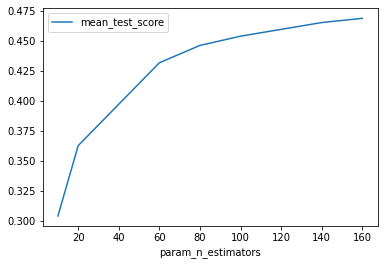

In [27]:
fig=results.plot('param_n_estimators','mean_test_score')
fig.figure.savefig('./figures/RF_n_estimators.png')

### Optimize the option 'max_features'

In [15]:
parameters = {'max_features' : ['auto', 10, 28, 50] }

clf_rf = RandomForestClassifier(n_estimators= 160, n_jobs=-1, random_state=0)
rf = GridSearchCV(clf_rf, parameters, n_jobs=-1)
rf.fit(X_train, y_train)

results = pd.DataFrame(rf.cv_results_)
results.sort_values('mean_test_score', ascending = False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,139.602488,35.278108,2.214755,1.323996,50,{'max_features': 50},0.453714,0.453333,0.449810,0.456000,0.462000,0.454971,0.004034,1
0,90.046102,2.883208,5.396243,1.339215,auto,{'max_features': 'auto'},0.450762,0.449714,0.449810,0.458857,0.460952,0.454019,0.004865,2
2,111.598845,4.151375,8.097577,1.206784,28,{'max_features': 28},0.450762,0.449714,0.449810,0.458857,0.460952,0.454019,0.004865,2
1,44.412139,0.834279,6.469653,1.267680,10,{'max_features': 10},0.441714,0.447333,0.440476,0.442762,0.453524,0.445162,0.004780,4


Run the random forest again with the selected options:

In [8]:
clf_rf = RandomForestClassifier(n_estimators=160, n_jobs=-1, random_state=0, max_features=50)
clf_rf.fit(X_train, y_train)
y_pred_rf = clf_rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
print ('Random forest accuracy: ',acc_rf)

Random forest accuracy:  0.47657777777777777


e:\python3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 1152x864 with 0 Axes>

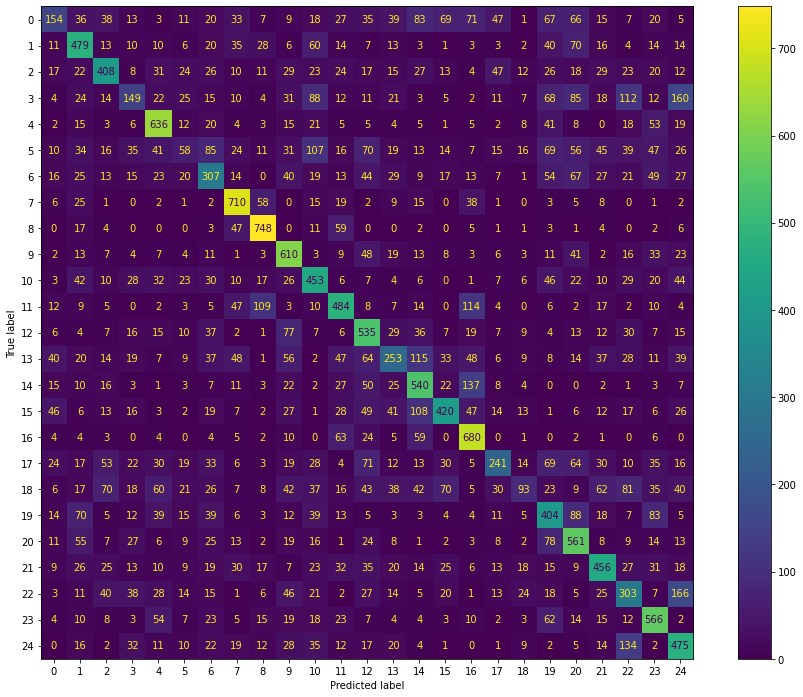

In [17]:
from sklearn.metrics import plot_confusion_matrix

plt.figure()
plt.rcParams['figure.figsize'] = (16, 12)
plot_confusion_matrix(clf_rf, X_test, y_test)
plt.savefig('figures/RandomForest.png')

Visualize the model to see which pixels had the highest importance:

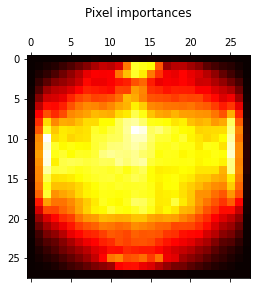

In [18]:
importances = clf_rf.feature_importances_
importances = importances.reshape((28,28))
plt.matshow(importances, cmap=plt.cm.hot)
plt.title('Pixel importances\n')
plt.savefig('./figures/RF_importances.png')

## K-Nearest Neighbors (KNN)

In [28]:
%%time 

clf_knn = KNeighborsClassifier(n_jobs=-1)
clf_knn.fit(X_train, y_train)
print(clf_knn)
y_pred_knn = clf_knn.predict(X_test)
acc_knn = accuracy_score(y_test, y_pred_knn)
print ('KNN accuracy: ',acc_knn)

KNeighborsClassifier(n_jobs=-1)
KNN accuracy:  0.39768888888888887
CPU times: total: 3min 31s
Wall time: 1min 12s


### Optimize the option 'n_neighbors'

In [5]:
%%time

parameters = {'n_neighbors': [1,3,5,7,9,11,13]}

clf_knn = KNeighborsClassifier(n_jobs=-1)
knn = GridSearchCV(clf_knn, parameters, n_jobs=-1)
knn.fit(X_train, y_train)

results_knn = pd.DataFrame(knn.cv_results_)
results_knn.sort_values('mean_test_score', ascending = False)

CPU times: total: 438 ms
Wall time: 9min 40s


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
4,0.235290,0.111579,125.804897,6.779706,9,{'n_neighbors': 9},0.387619,0.397333,0.391429,0.397905,0.396286,0.394114,0.003971,1
5,0.166002,0.100395,129.342231,5.495314,11,{'n_neighbors': 11},0.389238,0.396476,0.390857,0.399333,0.394476,0.394076,0.003670,2
6,0.214233,0.102674,86.043929,31.314078,13,{'n_neighbors': 13},0.389714,0.393810,0.394286,0.396286,0.392476,0.393314,0.002176,3
3,0.113327,0.030689,125.940028,4.161815,7,{'n_neighbors': 7},0.388286,0.391524,0.388381,0.394381,0.395333,0.391581,0.002933,4
2,0.227907,0.057422,126.811669,4.148083,5,{'n_neighbors': 5},0.381238,0.381429,0.380857,0.387524,0.392571,0.384724,0.004634,5
0,0.285180,0.209066,134.052899,8.053785,1,{'n_neighbors': 1},0.361238,0.365429,0.361333,0.372571,0.365238,0.365162,0.004124,6
1,0.299978,0.159916,142.119777,15.398507,3,{'n_neighbors': 3},0.359905,0.361143,0.350190,0.368476,0.363619,0.360667,0.006004,7


e:\python3\lib\site-packages\pandas\core\indexes\base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


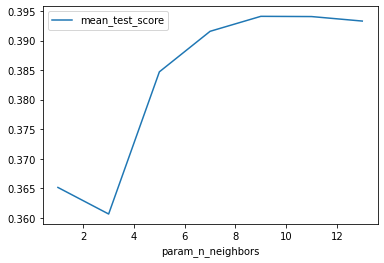

In [6]:
fig=results_knn.plot('param_n_neighbors','mean_test_score')
fig.figure.savefig('./figures/KNN_n_neighbors.png')

Run the random forest again with the selected options:

In [7]:
%%time 

clf_knn = KNeighborsClassifier(n_jobs=-1, n_neighbors=9)
clf_knn.fit(X_train, y_train)
print(clf_knn)
y_pred_knn = clf_knn.predict(X_test)
acc_knn = accuracy_score(y_test, y_pred_knn)
print ('KNN accuracy: ',acc_knn)

KNeighborsClassifier(n_jobs=-1, n_neighbors=9)
KNN accuracy:  0.40475555555555554
CPU times: total: 3min 24s
Wall time: 1min 10s


e:\python3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 432x288 with 0 Axes>

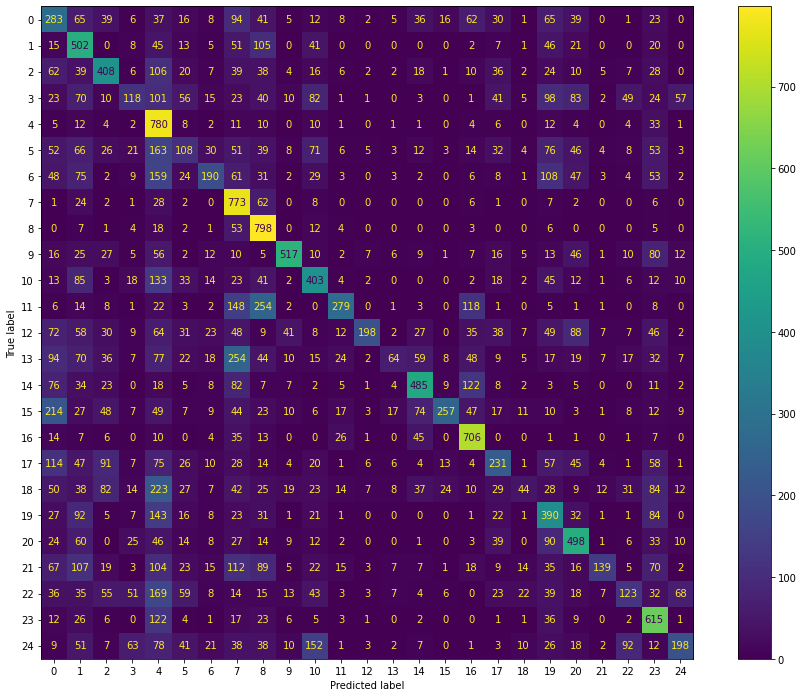

In [8]:
from sklearn.metrics import plot_confusion_matrix

plt.figure()
plt.rcParams['figure.figsize'] = (16, 12)
plot_confusion_matrix(clf_knn, X_test, y_test)
plt.savefig('figures/KNN.png')

## Support Vector Machines (SVMs)

In [10]:
%%time

clf_sgd = SGDClassifier(loss='hinge', random_state=0) # loss='hinge' results in a linear SVM
clf_sgd.fit(X_train, y_train)
print(clf_sgd)
y_pred_sgd = clf_sgd.predict(X_test)
acc_sgd = accuracy_score(y_test, y_pred_sgd)
print ('SVM stochastic gradient descent accuracy: ',acc_sgd)

SGDClassifier(random_state=0)
SVM stochastic gradient descent accuracy:  0.21
CPU times: total: 6min 29s
Wall time: 6min 33s


## Comparing different methods

In [11]:
%%time

np.random.seed(0)

N_train = [100,200,500,1000] # the number of training examples to be used
acc_scores = pd.DataFrame()

for i in N_train:
    X, y = [], []
    for file in os.listdir('./datasets/png'):
        for mode in ['train', 'valid', 'test']:
            category_name = file[:-8]   # category_name_png.npz
            data = np.load(os.path.join('./datasets/png', file))[mode] # (size, 28, 28)
            label_no = int(label_dict[category_name])
            label = np.ones(np.shape(data)[0], dtype=int) * label_no
            X.append(data[0:i])
            y.append(label[0:i])
    X = np.concatenate(X)
    y = np.concatenate(y)
    print('Loaded %d samples dataset.' % (np.shape(X)[0]))
    X = (X.reshape(X.shape[0], X.shape[1] * X.shape[2]))
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)
    
    # run the different scikit-learn models:
    clf_rf = RandomForestClassifier(n_estimators=160, n_jobs=-1, max_features=50)
    clf_rf.fit(X_train, y_train)
    acc_rf = clf_rf.score(X_test,y_test)
    acc_scores.at['RF', np.shape(X)[0]] = acc_rf
    print('Run RandomForest with %d samples done.' % (np.shape(X)[0]))
    
    clf_knn = KNeighborsClassifier(n_jobs=-1, n_neighbors=9)
    clf_knn.fit(X_train, y_train)
    acc_knn = clf_knn.score(X_test,y_test)
    acc_scores.at['KNN', np.shape(X)[0]] = acc_knn
    print('Run KNN with %d samples done.' % (np.shape(X)[0]))

    clf_sgd = SGDClassifier(loss='hinge', random_state=0) # loss='hinge' results in a linear SVM
    clf_sgd.fit(X_train, y_train)
    y_pred_sgd = clf_sgd.predict(X_test)
    acc_sgd = accuracy_score(y_test, y_pred_sgd)
    acc_scores.at['SGD', np.shape(X)[0]] = acc_sgd
    print('Run SGD with %d samples done.' % (np.shape(X)[0]))

Loaded 7500 samples dataset.
Run RandomForest with 7500 samples done.
Run KNN with 7500 samples done.
Run SGD with 7500 samples done.
Loaded 15000 samples dataset.
Run RandomForest with 15000 samples done.
Run KNN with 15000 samples done.
Run SGD with 15000 samples done.
Loaded 37500 samples dataset.
Run RandomForest with 37500 samples done.
Run KNN with 37500 samples done.
Run SGD with 37500 samples done.
Loaded 75000 samples dataset.
Run RandomForest with 75000 samples done.
Run KNN with 75000 samples done.
Run SGD with 75000 samples done.
CPU times: total: 23min 43s
Wall time: 11min 58s


In [12]:
acc_scores

,7500,15000,37500,75000
RF,0.362222,0.414889,0.455911,0.477467
KNN,0.301778,0.336889,0.376267,0.394933
SGD,0.236000,0.258667,0.258489,0.271644


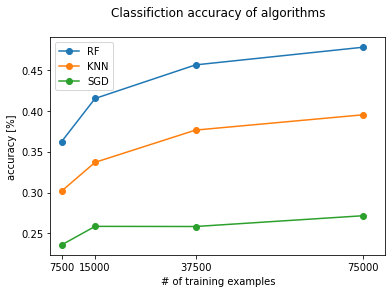

In [15]:
acc_scores.transpose().plot(xticks=list(acc_scores), xlim=(5000,80000), marker='o', title='Classifiction accuracy of algorithms\n')
plt.xlabel('# of training examples')
plt.ylabel('accuracy [%]')
plt.savefig('figures/traditional_methods.png')